In [1]:
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import seaborn as sns

In [2]:
tfd = tfp.distributions

In [3]:
normal = tfd.Normal(loc=0., scale=1.)

In [4]:
print(normal)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


In [5]:
normal_2 = tfd.Normal(loc=[0., 0.], scale=[1., 3.])

In [6]:
print(normal_2)

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)


In [7]:
normal_2.sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.95294863, 0.01426558], dtype=float32)>

In [8]:
normal_3 = tfd.MultivariateNormalDiag(loc = [[1.0, 0.3]])

In [9]:
print(normal_3)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[1], event_shape=[2], dtype=float32)


In [10]:
normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=-1.6364458>

In [11]:
normal_2.sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 1.5599971, -4.622168 ], dtype=float32)>

In [12]:
normal_3.sample()

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.49129403, -0.67457366]], dtype=float32)>

In [13]:
normal.prob(0.4)

<tf.Tensor: shape=(), dtype=float32, numpy=0.36827016>

In [14]:
normal_2.prob([0.4, 0.6])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.36827016, 0.13034755], dtype=float32)>

In [15]:
normal_3.prob([1, .4])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.15836117], dtype=float32)>

## Bernoulli Distributions

In [16]:
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import seaborn as sns
import tensorflow as tf

tfd = tfp.distributions

In [17]:
coin_flip = tfd.Bernoulli(probs=0.5, dtype=tf.int32)

In [18]:
coin_flip_data = coin_flip.sample(2000)

In [19]:
coin_flip.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [20]:
coin_flip.log_prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.6931472>

(array([ 982.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1018.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

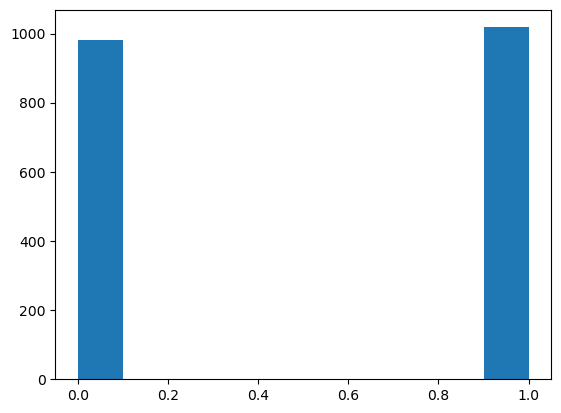

In [21]:
plt.hist(coin_flip_data)

In [22]:
coin_flip.mean()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [23]:
coin_flip.stddev()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

### Biased coin

(array([ 403.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1597.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

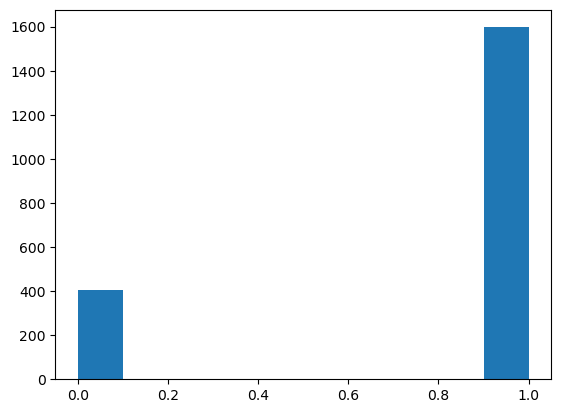

In [24]:
bias_coin_flip = tfd.Bernoulli(probs=0.8, dtype=tf.int32)
bias_coin_flip_data = bias_coin_flip.sample(2000)
plt.hist(bias_coin_flip_data)

In [25]:
bias_coin_flip.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.19999999>

### Two biased coins


In [26]:
two_bias_coins_flip = tfd.Bernoulli(probs=[0.8, 0.6], dtype=tf.int32)
two_bias_coins_flip_data = two_bias_coins_flip.sample(2000)

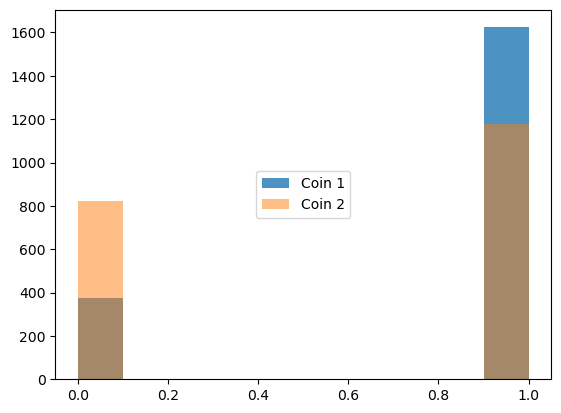

In [27]:
plt.hist(two_bias_coins_flip_data[:,0], alpha=0.8, label='Coin 1')
plt.hist(two_bias_coins_flip_data[:,1], alpha=0.5, label='Coin 2')
plt.legend(loc='center')

### Normal Distribution

In [28]:
import seaborn as sns

In [29]:
temperature = tfd.Normal(loc=35, scale = 4)

In [30]:
temperature_data = temperature.sample(1000)

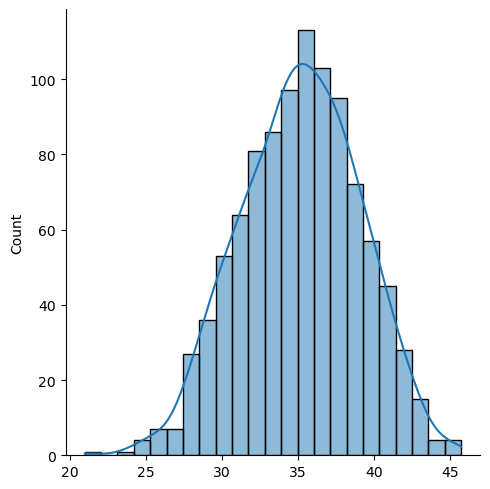

In [31]:
sns.displot(temperature_data, kde= True)

In [32]:
tf.math.reduce_mean(temperature_data) 

<tf.Tensor: shape=(), dtype=float32, numpy=35.153446>

In [33]:
temperature.mean()

<tf.Tensor: shape=(), dtype=float32, numpy=35.0>

In [34]:
tf.math.reduce_std(temperature_data) 

<tf.Tensor: shape=(), dtype=float32, numpy=3.9145832>

In [35]:
temperature.stddev()

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

#### Multivariate Normal

In [36]:
weather = tfd.MultivariateNormalDiag(loc = [35, 56], scale_diag=[4, 15])

In [37]:
weather_data = weather.sample(1000)

Text(0, 0.5, 'Humidity %')

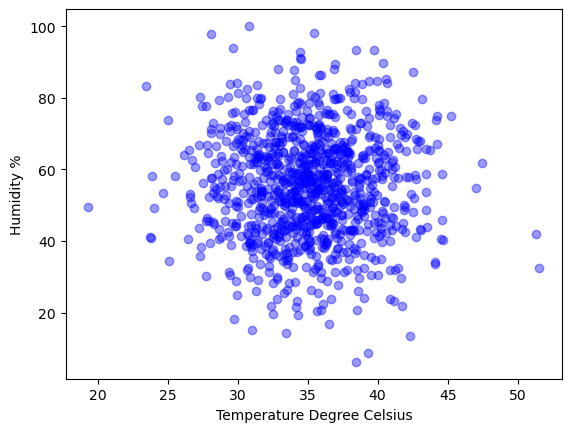

In [38]:
plt.scatter(weather_data[:, 0], weather_data[:, 1], color='blue', alpha=0.4)
plt.xlabel("Temperature Degree Celsius")
plt.ylabel("Humidity %")
